In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

C:\Users\sreel\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


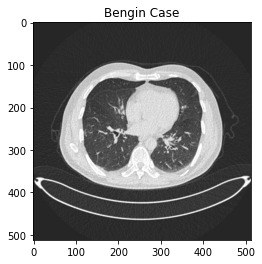

In [4]:
img = cv2.imread('C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

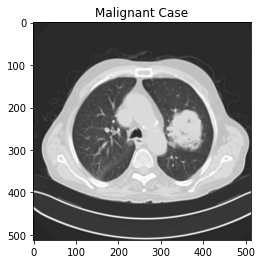

In [5]:
img = cv2.imread('C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (10).jpg')
plt.title('Malignant Case')
plt.imshow(img)

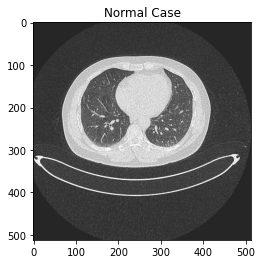

In [6]:
img = cv2.imread('C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [7]:
img.shape

(512, 512, 3)

In [12]:
dir = 'C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [13]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [14]:
random.shuffle(img_data)

In [15]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [16]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [17]:
for i in range(len(X)):
    X[i] = X[i]/255.0

In [18]:
X.shape

(1097, 256, 256, 3)

In [19]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [21]:
model = Sequential()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate the image by up to 15 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift the image vertically by up to 10% of the height
    shear_range=0.1,        # Shear the image by up to 10 degrees
    zoom_range=0.1,         # Zoom in or out by up to 10%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill in missing pixels with the nearest value
)
datagen.fit(x_train)

# Define the number of augmented images to generate per original image
augmented_images_per_original = 3

# Generate augmented images and append them to the training data
augmented_x_train = []
augmented_y_train = []
for i in range(len(x_train)):
    for _ in range(augmented_images_per_original):
        augmented_image = datagen.flow(np.expand_dims(x_train[i], axis=0), batch_size=1)[0][0]
        augmented_x_train.append(augmented_image)
        augmented_y_train.append(y_train[i])
# Convert lists to numpy arrays
augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

# Concatenate original and augmented training data
x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)

In [24]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 average_pooling2d (Average  (None, 128, 128, 128)     0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       1

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [28]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15


22/22 [==============================] - 127s 6s/step - loss: 1.3196 - accuracy: 0.4479 - val_loss: 0.9927 - val_accuracy: 0.5000
Epoch 2/15
22/22 [==============================] - 133s 6s/step - loss: 0.9588 - accuracy: 0.5235 - val_loss: 0.9903 - val_accuracy: 0.5000
Epoch 3/15
22/22 [==============================] - 152s 7s/step - loss: 0.9227 - accuracy: 0.5235 - val_loss: 0.9703 - val_accuracy: 0.5000
Epoch 4/15
22/22 [==============================] - 137s 6s/step - loss: 0.8871 - accuracy: 0.5563 - val_loss: 0.9316 - val_accuracy: 0.5000
Epoch 5/15
22/22 [==============================] - 131s 6s/step - loss: 1.0771 - accuracy: 0.6120 - val_loss: 0.8316 - val_accuracy: 0.5909
Epoch 6/15
22/22 [==============================] - 128s 6s/step - loss: 0.7258 - accuracy: 0.6833 - val_loss: 0.7487 - val_accuracy: 0.7557
Epoch 7/15
22/22 [==============================] - 127s 6s/step - loss: 0.5635 - accuracy: 0.7932 - val_loss: 0.5902 - val_accuracy: 0.7500
Epoch 8/15


In [29]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 10s 1s/step - loss: 0.1874 - accuracy: 0.9682


[0.18741241097450256, 0.9681817889213562]

In [30]:
result = model.predict(x_test)

7/7 [==============================] - 10s 1s/step


In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 11s 2s/step - loss: 0.1874 - accuracy: 0.9682
Test Loss: 0.18741241097450256
Test Accuracy: 0.9681817889213562


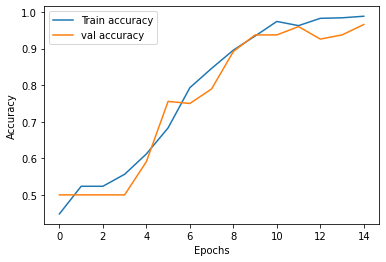

In [32]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

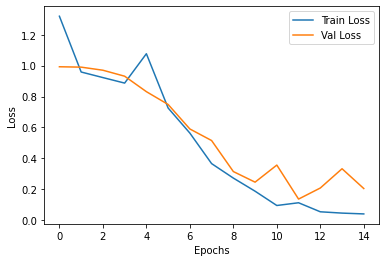

In [33]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

1/1 [==============================] - 0s 187ms/step
Predicted Class Label: 0
Confidence: 1.0
Predicted Category: Benign


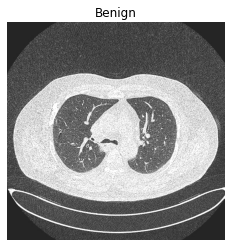

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = 'C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (110).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width)) 

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}
# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 [==============================] - 0s 114ms/step
Predicted Class Label: 1
Confidence: 1.0
Predicted Category: Malignant


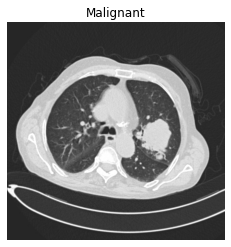

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = 'C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (60).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width)) 

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 [==============================] - 0s 80ms/step
Predicted Class Label: 2
Confidence: 1.0
Predicted Category: Normal


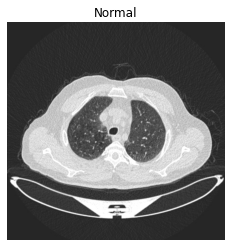

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = 'C:/Users/sreel/programs/termproject/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (1).jpg'
img = cv2.imread(image_path)


img = cv2.resize(img, (img_height, img_width))  

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

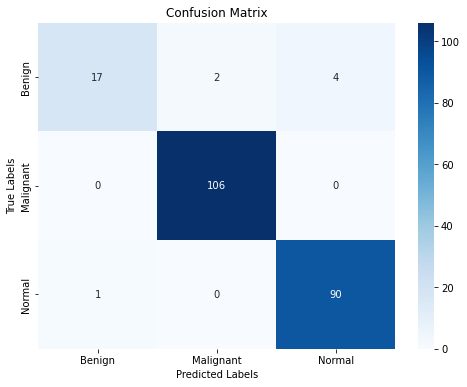

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define true labels and predicted labels
true_labels = y_test  
predicted_labels = np.argmax(result, axis=1)  

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels_to_categories.values(), 
            yticklabels=class_labels_to_categories.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()